In [1]:
import statsmodels.api as sm

In [2]:
data = pd.read_hdf('./WSC_HUC8_budyko.hdf','df')

In [4]:
def huc8int(huc8):
    return int(huc8)

In [6]:
data['huc82'] = data.huc8.map(huc8int)

In [8]:
data = data.loc[data.huc82==14010003]

In [13]:
data = data.groupby(by='wyears').mean()

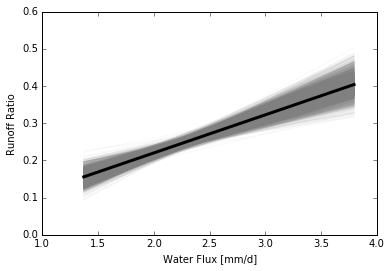

In [51]:
error = 40 # maximum percent positive or negative error
wflux_min = data.wflux.min()
wflux_max = data.wflux.max()
wflux = np.linspace(wflux_min,wflux_max,100)
r2 = []
p = []
slp = []
cept = []

for i in np.arange(0,2000,1):
    n = len(data)
    err = np.random.randint(100-error,100+error,n)/100. # generate some random errors for the precipitation increasing and decreading it by up to 20 percent
    tmp = pd.DataFrame({'P':data.P.copy(),'R':data.R.copy(),'wflux':data.wflux.copy()}) # make a new temporary data frame
    tmp['P'] *= err
    tmp['R_P'] = tmp['R']/tmp['P']
    mod = sm.formula.ols('R_P ~ wflux + 1',tmp).fit()
    r2.append(mod.rsquared)
    p.append(mod.f_pvalue)
    slp.append(mod.params['wflux'])
    cept.append(mod.params['Intercept'])
    plt.plot(wflux,(wflux*mod.params['wflux'])+mod.params['Intercept'],'-',c='0.5',alpha=0.05)

plt.plot(wflux,(wflux*np.mean(slp))+np.mean(cept),'-k',lw=3)
plt.xlabel('Water Flux [mm/d]')
plt.ylabel('Runoff Ratio')

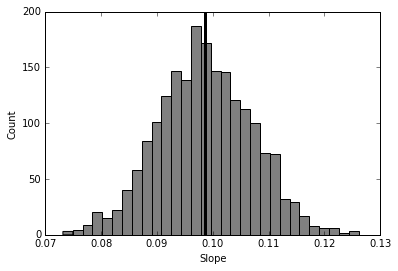

In [47]:
plt.hist(slp,30,facecolor='0.5');
plt.axvline(np.mean(slp),color='k',lw=3)
plt.xlabel('Slope')
plt.ylabel('Count')

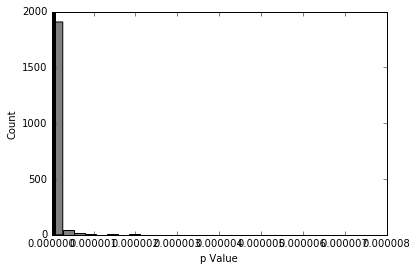

In [48]:
plt.hist(p,30,facecolor='0.5');
plt.axvline(np.mean(p),color='k',lw=3)
plt.xlabel('p Value')
plt.ylabel('Count')

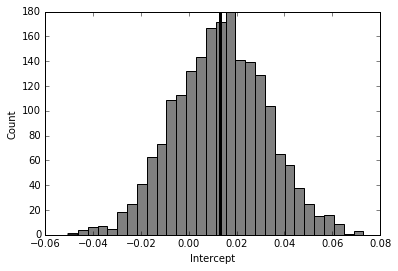

In [49]:
plt.hist(cept,30,facecolor='0.5');
plt.axvline(np.mean(cept),color='k',lw=3)
plt.xlabel('Intercept')
plt.ylabel('Count')

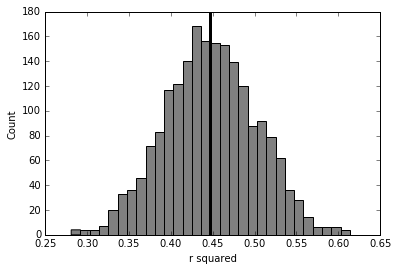

In [50]:
plt.hist(r2,30,facecolor='0.5');
plt.axvline(np.mean(r2),color='k',lw=3)
plt.xlabel('r squared')
plt.ylabel('Count')

In [8]:
P = 100. # mm
Q = 45. # mm
n = 100

RR = Q/P

error = np.random.randn(n)*10

In [9]:
P += error # add the error onto the precipidation

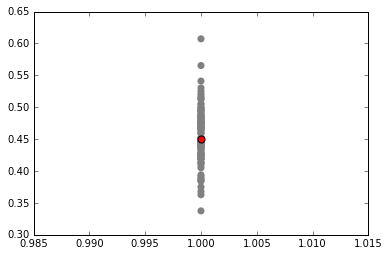

In [17]:
plt.scatter(np.repeat(1,n),Q/P,s=50,c='0.5',edgecolor='None')
plt.scatter(1,RR,s=50,c='r')

In [37]:
n = 35
b1 = 0.05
cept = 0.089
snowmelts = np.linspace(1,4,num=n,endpoint=True)
sm_error = np.random.normal(size=n)
rr_error = np.random.normal(size=n)
snowmelt2s = snowmelts + sm_error
RRs = (snowmelts*b1)+cept
RR2s = RRs + rr_error
RR2s.shape = (n,1)

In [42]:
X = sm.add_constant(snowmelt2s)
mod = sm.OLS(RR2s,X).fit()

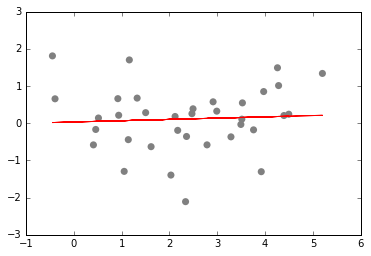

In [48]:
plt.scatter(snowmelt2s,RR2s,s=50,c='0.5',edgecolor='None')
plt.plot(snowmelt2s,mod.fittedvalues,'-r')
#plt.plot(snowmelts,RRs,'-k')

TypeError: 'buffer' object is not callable

In [43]:
print mod.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.027
Method:                 Least Squares   F-statistic:                    0.1157
Date:                Wed, 27 Apr 2016   Prob (F-statistic):              0.736
Time:                        14:49:13   Log-Likelihood:                -44.010
No. Observations:                  35   AIC:                             92.02
Df Residuals:                      33   BIC:                             95.13
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.0327      0.283      0.116      0.9